### PROJECT DESCRIPTION

This project is for a Banking institution. As a member of the data analytics team, my role involves creating tools that use the bank's operational data to help the business achieve its goals and projections.
For this project, I have been tasked to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "n" as "no"). My task involves analyzing the dataset to assess trends and inisghts. Also, I am tasked to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.



### HYPOTHESIS FORMULATION

**NULL HYPOTHESIS(H0) :** There is a significant relationship between a client job status and the likelihood of subscribing to a teram deposit
.

**ALTERNATE HYPOTHESIS(H1) :** There is no significant difference between a client job status and the likelihood of subscribing to a teram deposit

### BUSINESS QUESTIONS

1. What was the overview of churn for the period under review?
2. Which regions have the highest concentration of customers?
3. Which region had the highest churn rate?
4. Which category of customers churned the most?

### IMPORT PACKAGES

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

# Import pandas and numpy
import pandas as pd
import numpy as np

# Import statistical packages
from scipy.stats import ttest_ind
import scipy.stats as stats

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
plt.style.use("fivethirtyeight")

# Import machine learning models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Import Pipeline, Scaler,Sampler, train_test_split, imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN 

# Import Encoders
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# import metrics
from sklearn.metrics import recall_score, mean_squared_log_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

import os, pickle, joblib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', message='The default value of numeric_only in DataFrame.corr is deprecated')

<Figure size 1000x400 with 0 Axes>

## IMPORT DATA

In [5]:
bank_add_full = pd.read_csv("C://Users//elvis_d//Downloads//data 1\\data\\bank-additional-full.csv",
                           delimiter = ";")

bank_add = pd.read_csv("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank-additional.csv", 
                      delimiter = ";")

bank_full = pd.read_csv("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank-full.csv", delimiter = ";")

bank = pd.read_csv("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank.csv", delimiter = ";")

bank_test = pd.read_csv("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank.csv"

## EXPLORATORY DATA ANALYSIS

In [77]:
# Open and read text file to get an understanding of the data

text_file = open("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank-names.txt", "r")
for info in text_file:
    print(info)
text_file.close()

1. Relevant Information:



   The data is related with direct marketing campaigns of a banking institution. 

   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 

   in order to access if the product (bank term deposit) would be (or not) subscribed. 



   There are two datasets: 

      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).

      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.

   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).



2. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)



3. Number of Attributes: 16 + output attribute.



4. Attribute information:



   Input variables:

   # bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",

         

In [52]:
# Randomly checking samples of bank_additonal_full data

pd.options.display.max_columns = None
bank_add_full.sample(5, random_state=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35577,32,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,mon,114,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
13950,33,blue-collar,single,basic.6y,unknown,yes,yes,cellular,jul,fri,103,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
29451,25,self-employed,divorced,university.degree,no,yes,no,cellular,apr,mon,227,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
32295,34,blue-collar,single,high.school,no,yes,no,cellular,may,fri,56,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
27477,53,technician,married,professional.course,no,yes,no,cellular,nov,fri,11,7,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no


In [67]:
# Check shape of bank-additional-full data

print("The Bank-Additional-Full data contains ",bank_add_full.shape[0], "rows and ",  
      bank_add_full.shape[1], "colums" )

The Bank-Additional-Full data contains  41188 rows and  21 colums


In [68]:
# Check the basic info in the bank-additional-full data

bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [69]:
# Check for null values in bank-additional-full data

bank_add_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values in the data and datatypes are floats, integers and objects

In [70]:
# Check for duplicated values in the bank-additional-full data

bank_add_full.duplicated().sum()

12

There are 12 duplicates in the bank-additional-full data

In [71]:
# Checking for the duplicated entries

bank_add_full[bank_add_full.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [72]:
# Randomly checking samples of bank_add data

pd.options.display.max_columns = None
bank_add.sample(5, random_state=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3291,54,blue-collar,married,basic.9y,no,yes,yes,cellular,nov,wed,101,1,999,0,nonexistent,-3.4,92.649,-30.1,0.719,5017.5,no
3978,50,management,single,university.degree,no,yes,no,cellular,nov,tue,600,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
3707,60,retired,married,high.school,no,no,no,cellular,may,thu,181,3,6,1,success,-1.8,93.876,-40.0,0.699,5008.7,yes
3239,31,unemployed,single,high.school,no,no,no,cellular,may,thu,339,2,999,0,nonexistent,-1.8,93.876,-40.0,0.692,5008.7,no
2934,30,services,married,high.school,no,yes,yes,telephone,may,fri,114,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no


In [73]:
# Check shape of bank-add data

print("The Bank-Add data contains ",bank_add.shape[0], "rows and ",  
      bank_add.shape[1], "colums" )

The Bank-Add data contains  4119 rows and  21 colums


In [74]:
# Check the basic info in the bank-add data

bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [56]:
# # Check for duplicated values in the bank-add data

bank_add.duplicated().sum()

0

There are no duplicated values in the data

In [78]:
# # Check shape of bank full data

print("The Bank Full data contains ",bank_full.shape[0], "rows and ",  
      bank_full.shape[1], "colums" )

The Bank Full data contains  45211 rows and  17 colums


In [59]:
# Randomly checking samples of bank_full data

pd.options.display.max_columns = None
bank_full.sample(5, random_state=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3610,42,blue-collar,married,primary,no,2519,yes,no,unknown,15,may,262,4,-1,0,unknown,no
11677,37,technician,married,secondary,no,2209,no,no,unknown,20,jun,167,2,-1,0,unknown,no
33018,32,admin.,married,secondary,no,923,yes,no,cellular,17,apr,819,4,-1,0,unknown,no
44323,53,blue-collar,married,primary,no,306,no,no,cellular,28,jul,388,3,181,1,success,yes
8119,32,technician,single,tertiary,no,257,yes,no,unknown,2,jun,183,5,-1,0,unknown,no


In [75]:
# Check the basic info in the bank-full data

bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
# # Check for duplicated values in the bank-full data

bank_full.duplicated().sum()

0

There are no duplicates in the bank-full data

In [62]:
# # Check shape of bank data

print("The Bank data contains ",bank.shape[0], "rows and ",  
      bank.shape[1], "colums" )

The Bank data contains  4521 rows and  17 colums


In [63]:
# Randomly checking samples of bank data

pd.options.display.max_columns = None
bank.sample(5, random_state=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1236,32,admin.,single,secondary,no,116,no,yes,cellular,16,jul,255,2,-1,0,unknown,no
2183,46,blue-collar,married,primary,no,174,no,yes,cellular,15,jul,90,1,-1,0,unknown,no
1573,50,blue-collar,married,secondary,no,372,yes,no,telephone,11,may,21,1,-1,0,unknown,no
4489,45,management,married,tertiary,no,6945,no,no,cellular,5,aug,131,5,356,3,failure,no
1801,49,blue-collar,married,secondary,no,579,yes,no,unknown,28,may,396,1,-1,0,unknown,no


In [66]:
# Check the basic info in the bankdata

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [65]:
# # Check for duplicated values in the bank data

bank.duplicated().sum()

0

There are no duplicates in the Bank data

## UNIVARIATE ANALYSIS

The univariate analysis is done using the Bank-Additional-Full dataset

In [79]:
bank_full.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


no     36548
yes     4640
Name: y, dtype: int64


Text(0.5, 0, 'term deposit')

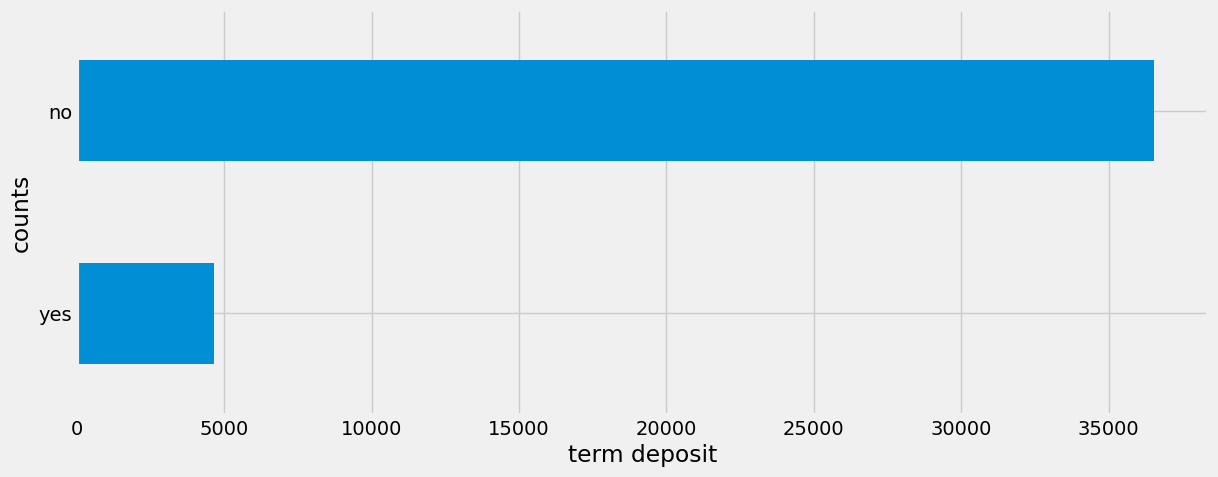

In [81]:
# Check value count of y, that is clients that have subscribed to a term deposit(predicting feature)

print(bank_add_full['y'].value_counts())

plt.figure(figsize=(13,5))
bank_add_full['y'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('counts')
plt.xlabel('term deposit')